# AudioClassification_EDA

#### Exploratory Data Analysis(EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Dataset Link:- https://urbansounddataset.weebly.com/urbansound8k.html

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import wavfile as wav

import pandas as pd
import os

In [2]:
debussy_file = 'dog_bark.wav'

In [3]:
ipd.Audio(debussy_file)

In [4]:
# load audio files with librosa
data, sr = librosa.load(debussy_file)

Text(0.5, 1.0, 'Debusy')

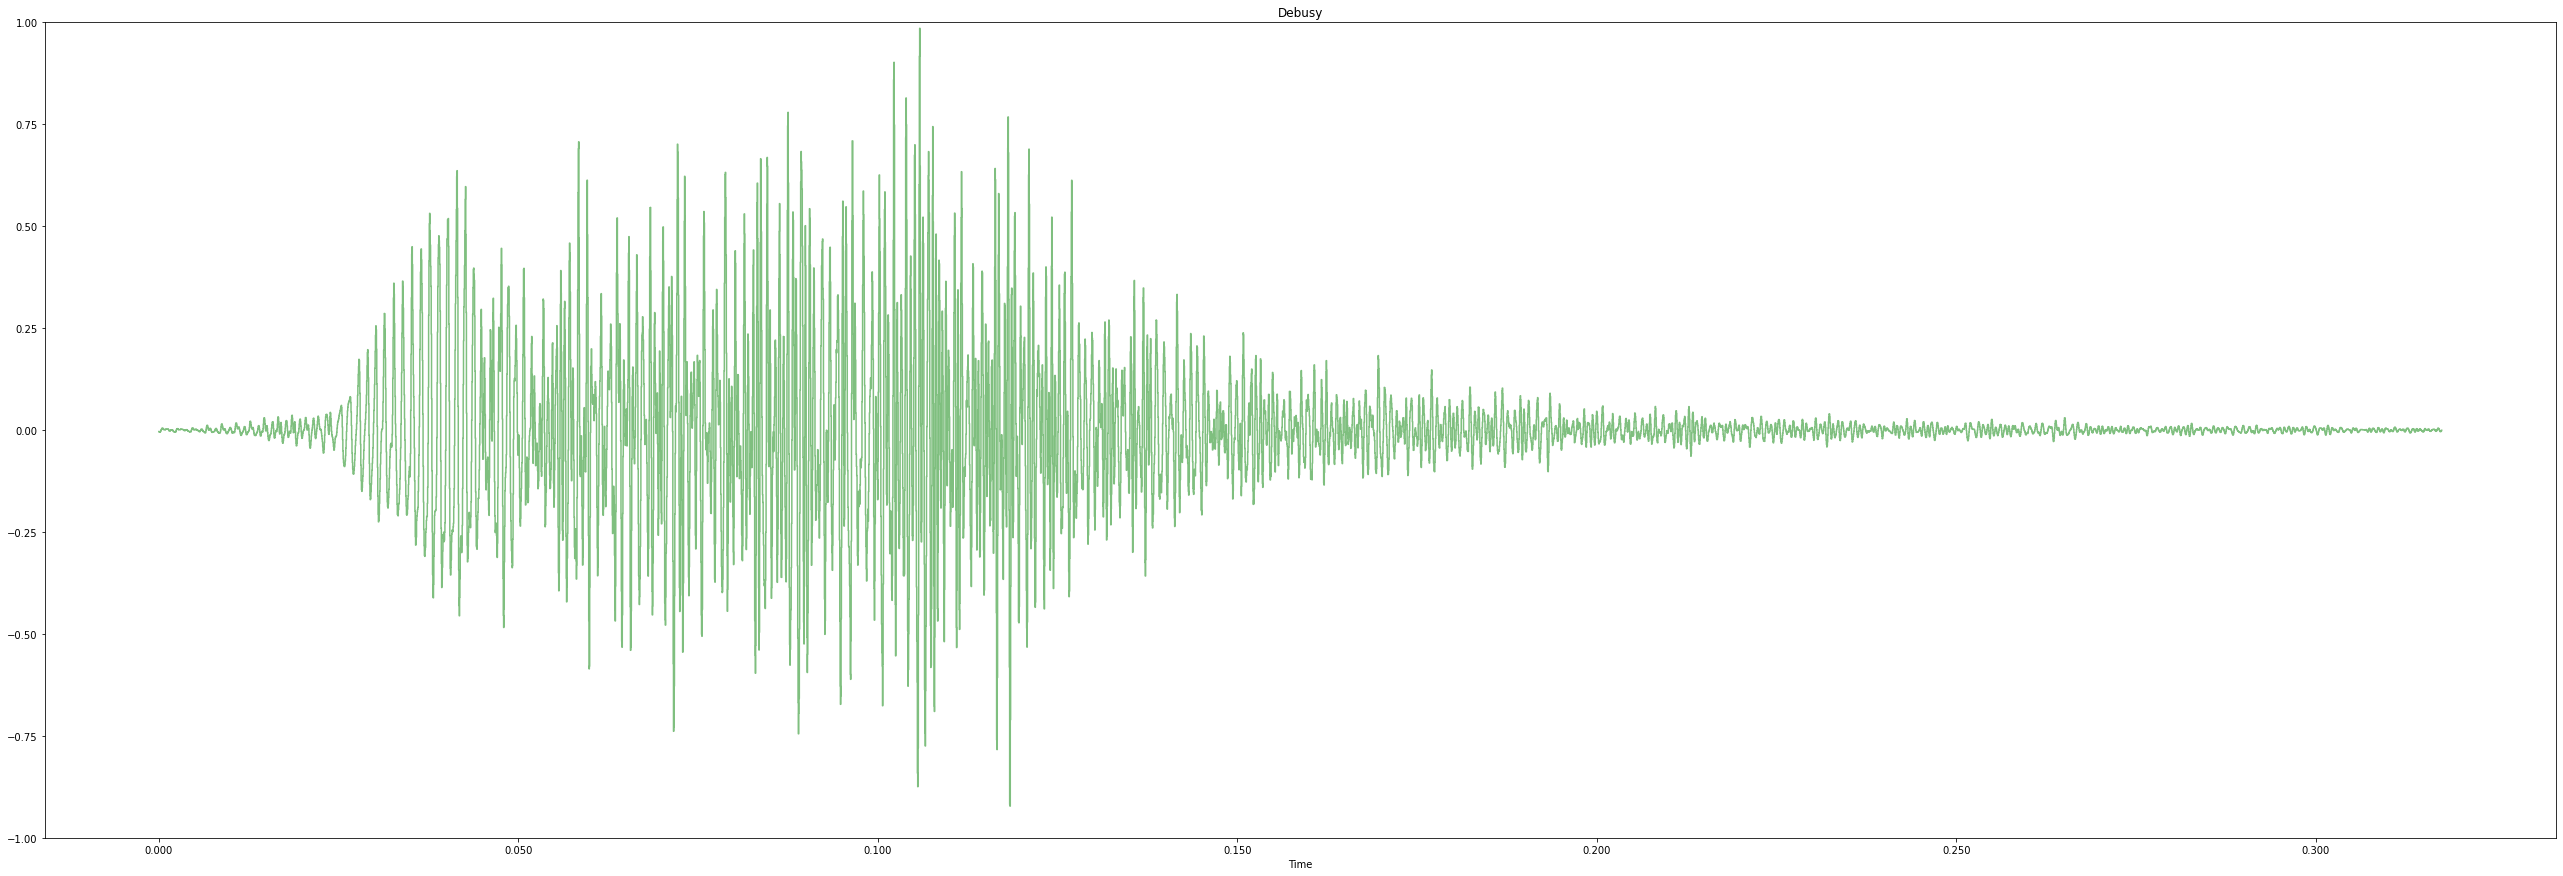

In [5]:
# visualize the waveform

plt.figure(figsize=(45, 15))

plt.subplot(1,1,1)
librosa.display.waveshow(data, alpha=0.5, color='g')
plt.ylim((-1, 1))
plt.title("Debusy")

In [6]:
sr

22050

In [7]:
scipy_sr, scipy_data = wav.read(debussy_file)

In [8]:
scipy_sr

44100

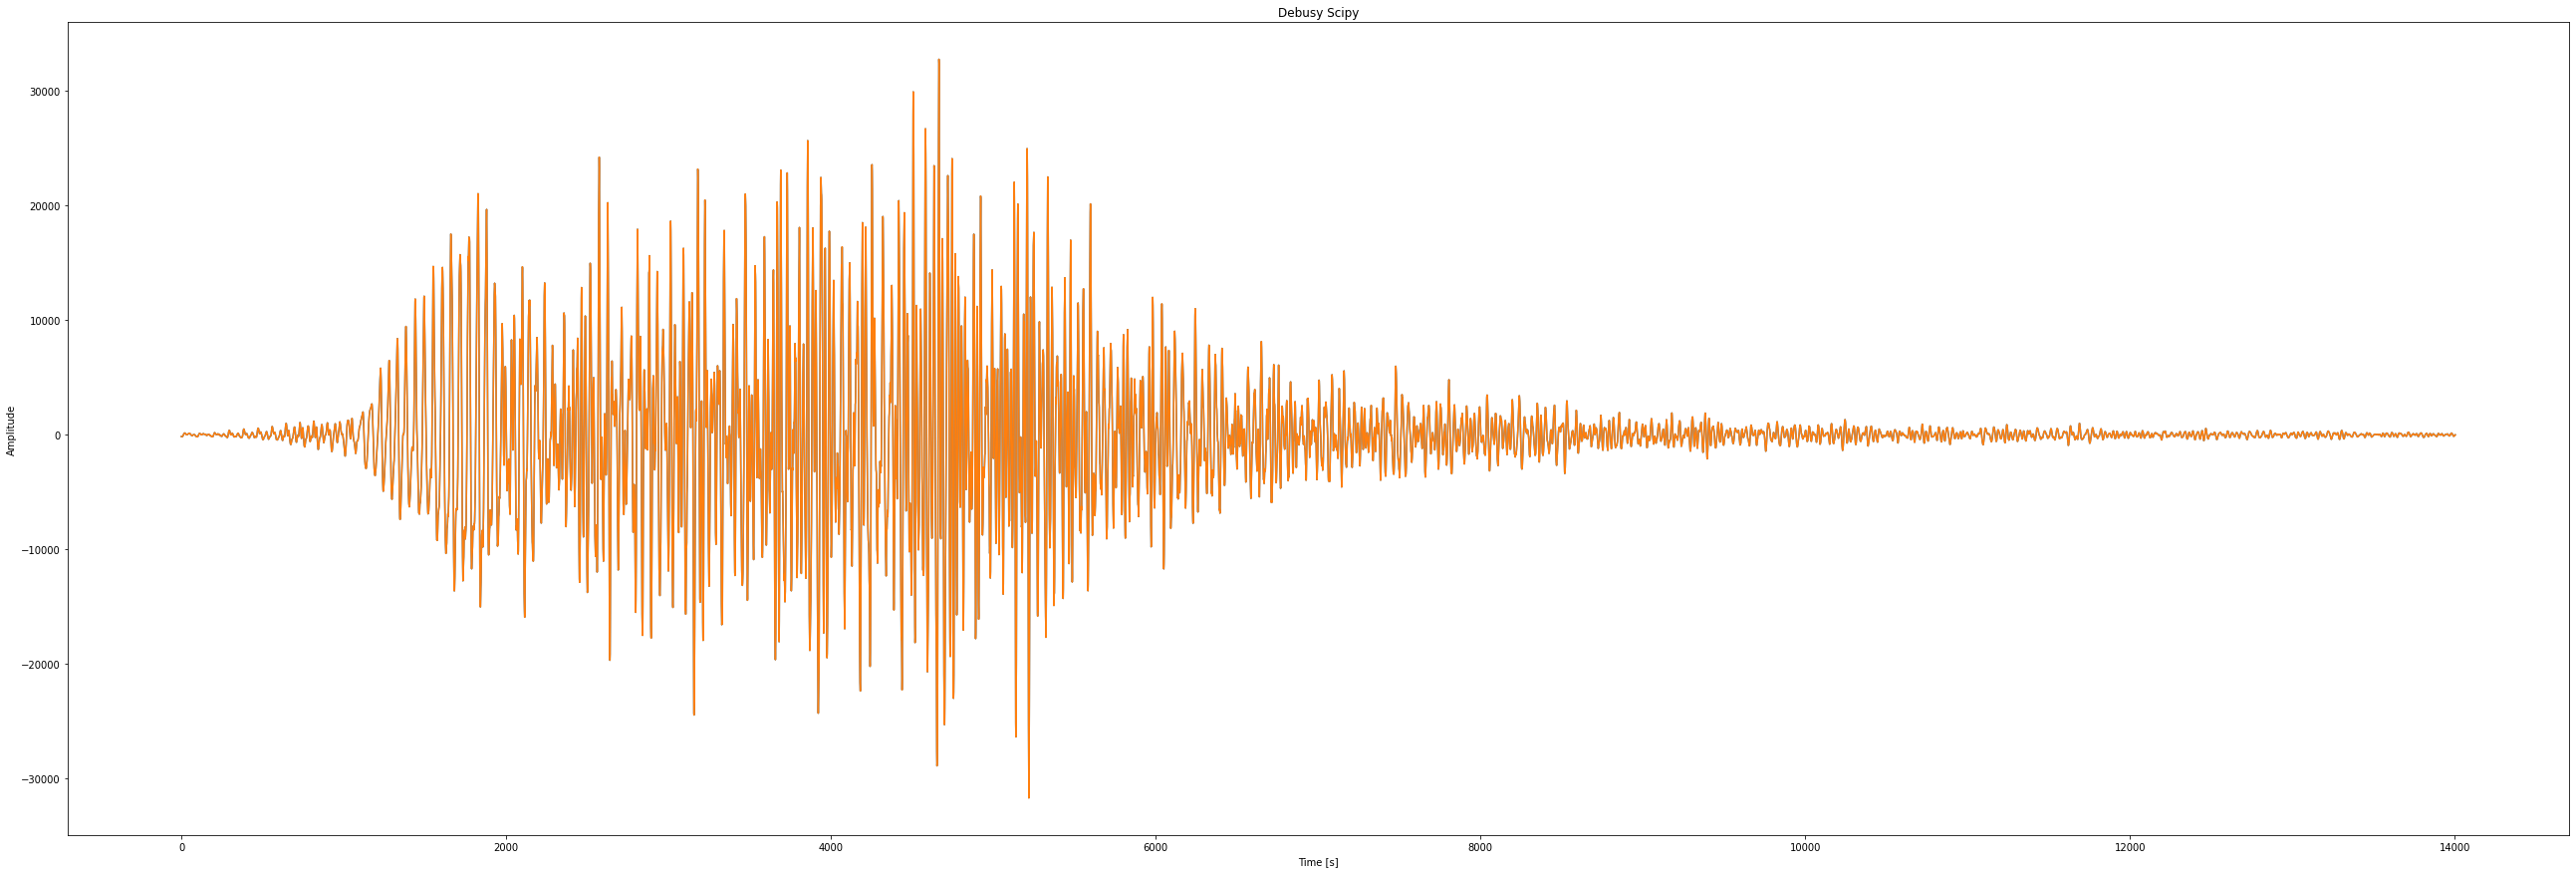

In [9]:
# visualize the waveform 

plt.figure(figsize=(45, 15))
plt.plot(scipy_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Debusy Scipy")
plt.show()

### librossa_data vs scipy_data

In [10]:
data      ### amplitudes normalized btw. -1 & 1, mono audio

array([-0.00346022, -0.00502555, -0.00465325, ..., -0.00248061,
       -0.00155105, -0.0003528 ], dtype=float32)

In [11]:
scipy_data    ### original amplitudes, stereo audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

### Reading metadata.csv

In [12]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(12)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


## checking whether dataset is imbalanced

In [13]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [14]:
# not that much imbalanced dataset -> since approx equal no. of audio files of each category is present

## Vid#2

## Extracting features

## Mel Frequency Cepstral Coefficients(MFCC) -
        MFCC summarizes the frequency distribution across window size
        This way, we can analyse both freq. & time characteristics of the sound

In [15]:
mfccs = librosa.feature.mfcc(y=data, n_mfcc=13, sr=sr)

In [16]:
mfccs.shape

(13, 14)

In [17]:
mfccs

array([[-3.32427124e+02, -1.70277939e+02, -9.08981323e+01,
        -5.75579910e+01, -4.08698387e+01, -5.11360359e+01,
        -9.97961960e+01, -1.60304886e+02, -2.16299332e+02,
        -2.68092957e+02, -3.16590179e+02, -3.55580566e+02,
        -3.90174805e+02, -4.23439819e+02],
       [ 1.19947655e+02,  8.42706680e+01,  6.26093369e+01,
         4.90830307e+01,  3.99806747e+01,  3.48531494e+01,
         3.15616112e+01,  3.52858582e+01,  4.51611938e+01,
         5.68097420e+01,  6.87062302e+01,  7.88703461e+01,
         8.59241333e+01,  9.20206223e+01],
       [-1.03422852e+02, -1.21067368e+02, -1.30418457e+02,
        -1.38000931e+02, -1.44247437e+02, -1.46115784e+02,
        -1.40776672e+02, -1.30486084e+02, -1.27024536e+02,
        -1.23836563e+02, -1.14751450e+02, -1.10337631e+02,
        -1.04676651e+02, -9.31469498e+01],
       [-5.20450516e+01, -6.10827141e+01, -7.29892883e+01,
        -7.81552887e+01, -7.49615784e+01, -7.40660706e+01,
        -7.26750183e+01, -6.61524124e+01, -6.

### Visualizing MFCC

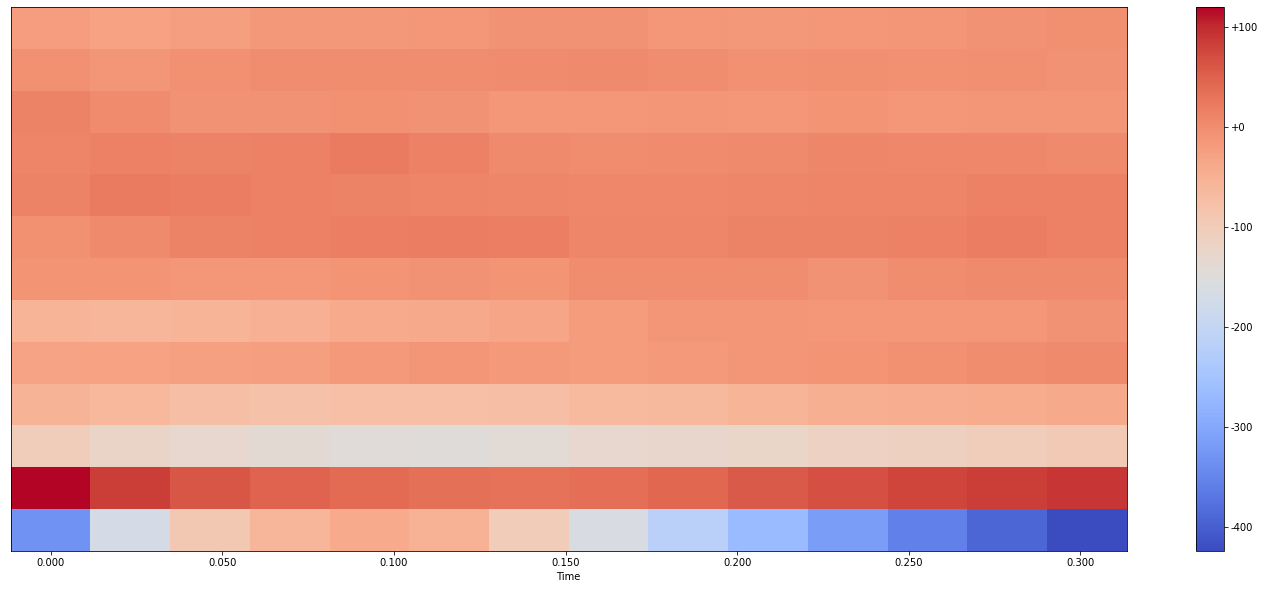

In [18]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting MFCC for all audio files

In [19]:
audio_dataset_path = 'UrbanSound8K/audio/'

In [20]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs_feature.T, axis=0)
    
    return mfccs_scaled_feature

In [21]:
# iterating through all the files to extract MFCC
from tqdm import tqdm    # here used to see progress
extracted_features = []
for index, row in tqdm(metadata.iterrows()):   # to iterate through all the rows of metadata
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold']) + '/', str(row['slice_file_name']) )
    final_class_labels = row['class']
    
    new_data = feature_extractor(file=file_name)
    extracted_features.append([new_data, final_class_labels])

3555it [04:34, 13.77it/s]C:\Program Files\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [10:24, 19.88it/s]C:\Program Files\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8329it [10:24, 26.49it/s]C:\Program Files\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [10:52, 13.39it/s]


In [22]:
# converting the extracted_features list into pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])

In [23]:
extracted_features_df.head()

,features,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [24]:
# splitting dataset into independent & dependent features

X = np.array(extracted_features_df['features'].to_list())
Y = np.array(extracted_features_df['class'].to_list())

In [25]:
X.shape

(8732, 40)

In [26]:
Y.shape

(8732,)

In [27]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
### Label Encoding
# Y = np.array(pd.get_dummies(Y))

### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [29]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
Y.shape

(8732, 10)

#### Train Test Split

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912868e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008629e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066742e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667519e+00, -8.8792086e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413874e+00]], dtype=float32)

In [33]:
X_train.shape

(6985, 40)

In [34]:
X_test

array([[-2.6864090e+02,  1.0516959e+02,  1.6310549e+01, ...,
        -1.5550406e+00, -6.6717374e-01, -3.0795305e+00],
       [-4.6647327e+02,  1.5016655e+00, -3.4400040e+01, ...,
         1.7706207e+01,  1.3831075e+01, -5.1632876e+00],
       [-9.4321190e+01,  4.5096165e+01, -4.3605549e+01, ...,
         4.3434143e+00, -7.7579916e-01, -1.7241189e+00],
       ...,
       [-1.2965582e+02,  1.4068562e+02, -3.5013344e+01, ...,
        -9.2866459e+00,  4.6785512e+00,  1.2090994e+01],
       [-2.0651558e+02,  9.9582108e+01, -3.1021313e+01, ...,
        -2.1591054e-01,  9.5544910e-01,  7.0967859e-01],
       [-2.8766943e+02,  1.5093176e+02,  6.2241521e+00, ...,
        -2.6231229e-01, -2.1278443e+00, -1.5802815e+00]], dtype=float32)

In [35]:
X_test.shape

(1747, 40)

In [36]:
Y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [37]:
Y_train.shape

(6985, 10)

In [38]:
Y_test.shape

(1747, 10)

## Model Creation

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.9.1'

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [42]:
# no. of classes

num_of_labels = Y.shape[1]

In [43]:
num_of_labels

10

In [44]:
model = Sequential()

# first layer
model.add(Dense(100, input_shape=(40,) ))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_of_labels))
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [46]:
# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## ModelTraining

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_of_epochs = 100
num_of_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/urbanSoundClassification_model.hdf5',
                              verbose=1, save_best_only=True)

start_time = datetime.now()
model.fit(X_train, Y_train, 
          batch_size=num_of_batch_size, epochs=num_of_epochs, 
          validation_data=(X_test, Y_test), 
          callbacks=[checkpointer], verbose=1)

training_time = datetime.now() - start_time
print("Training completed in time: ", training_time)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 11.9381 - accuracy: 0.1201
Epoch 1: val_loss improved from inf to 2.29275, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 11.8018 - accuracy: 0.1203 - val_loss: 2.2927 - val_accuracy: 0.1110
Epoch 2/100
204/219 [==========================>...] - ETA: 0s - loss: 2.5814 - accuracy: 0.1198
Epoch 2: val_loss improved from 2.29275 to 2.28262, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5693 - accuracy: 0.1194 - val_loss: 2.2826 - val_accuracy: 0.1093
Epoch 3/100
205/219 [===========================>..] - ETA: 0s - loss: 2.3518 - accuracy: 0.1192
Epoch 3: val_loss improved from 2.28262 to 2.27548, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3493 - accuracy: 0.1195 - val_los

Epoch 25/100
201/219 [==========================>...] - ETA: 0s - loss: 1.5157 - accuracy: 0.4750
Epoch 25: val_loss improved from 1.33866 to 1.33267, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.5149 - accuracy: 0.4750 - val_loss: 1.3327 - val_accuracy: 0.5610
Epoch 26/100
200/219 [==========================>...] - ETA: 0s - loss: 1.4957 - accuracy: 0.4795
Epoch 26: val_loss improved from 1.33267 to 1.29694, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4901 - accuracy: 0.4813 - val_loss: 1.2969 - val_accuracy: 0.5489
Epoch 27/100
213/219 [============================>.] - ETA: 0s - loss: 1.4648 - accuracy: 0.4940
Epoch 27: val_loss improved from 1.29694 to 1.26268, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4620 - accuracy: 0.4953 -

Epoch 51/100
217/219 [============================>.] - ETA: 0s - loss: 1.1157 - accuracy: 0.6237
Epoch 51: val_loss did not improve from 0.92539
219/219 [==============================] - 1s 3ms/step - loss: 1.1151 - accuracy: 0.6239 - val_loss: 0.9389 - val_accuracy: 0.6903
Epoch 52/100
215/219 [============================>.] - ETA: 0s - loss: 1.1239 - accuracy: 0.6222
Epoch 52: val_loss did not improve from 0.92539
219/219 [==============================] - 1s 4ms/step - loss: 1.1228 - accuracy: 0.6226 - val_loss: 0.9392 - val_accuracy: 0.6966
Epoch 53/100
214/219 [============================>.] - ETA: 0s - loss: 1.1183 - accuracy: 0.6227
Epoch 53: val_loss improved from 0.92539 to 0.90949, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.1148 - accuracy: 0.6230 - val_loss: 0.9095 - val_accuracy: 0.6955
Epoch 54/100
212/219 [============================>.] - ETA: 0s - loss: 1.1163 - accuracy: 0.6243
E

203/219 [==========================>...] - ETA: 0s - loss: 1.0234 - accuracy: 0.6544
Epoch 78: val_loss did not improve from 0.80713
219/219 [==============================] - 1s 3ms/step - loss: 1.0211 - accuracy: 0.6571 - val_loss: 0.8268 - val_accuracy: 0.7401
Epoch 79/100
215/219 [============================>.] - ETA: 0s - loss: 1.0097 - accuracy: 0.6561
Epoch 79: val_loss did not improve from 0.80713
219/219 [==============================] - 1s 3ms/step - loss: 1.0097 - accuracy: 0.6563 - val_loss: 0.8254 - val_accuracy: 0.7464
Epoch 80/100
219/219 [==============================] - ETA: 0s - loss: 0.9960 - accuracy: 0.6649
Epoch 80: val_loss did not improve from 0.80713
219/219 [==============================] - 1s 3ms/step - loss: 0.9960 - accuracy: 0.6649 - val_loss: 0.8219 - val_accuracy: 0.7367
Epoch 81/100
218/219 [============================>.] - ETA: 0s - loss: 1.0180 - accuracy: 0.6628
Epoch 81: val_loss did not improve from 0.80713
219/219 [===========================

In [48]:
accuracy = model.evaluate(X_test, Y_test, verbose=0)
accuracy

[0.7879756689071655, 0.7538637518882751]

In [49]:
accuracy[1]

0.7538637518882751

## Testing with single audio file

In [50]:
# audio_file = '30206-7-0-5.wav'
audio_file = 'dog_bark.wav'
# audio_file = 'UrbanSound8K/audio/fold5/6508-9-0-6.wav'
ipd.Audio(audio_file)

In [51]:
prediction_feature = feature_extractor(audio_file)
prediction_feature = prediction_feature.reshape(1,-1)

# note:- model.predict_classes() is deprecated, use model.predict() instead
final_prediction = model.predict(prediction_feature)

1/1 [==============================] - 0s 124ms/step


In [130]:
final_prediction

array([[0.16404203, 0.0264978 , 0.06952116, 0.06066995, 0.02434356,
        0.3850509 , 0.01099816, 0.00625223, 0.01621576, 0.23640852]],
      dtype=float32)

In [131]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

## Testing some Test audio
        Steps:-
            1. Preprocess new audio data
            2. predict it's class
            3. Inverse transform the prediction label

In [132]:
mfccs_extracted_feature = feature_extractor(audio_file)
mfccs_extracted_feature = mfccs_extracted_feature.reshape(1, -1)
mfccs_extracted_feature

array([[-2.0642319e+02,  1.8106291e+02, -3.6851849e+01,  5.5860432e+01,
        -1.1423388e+01,  1.8837555e+01, -7.0539565e+00,  3.6723626e+00,
        -7.8612576e+00,  4.3384647e+00,  4.5710311e+00, -1.1743152e+00,
         7.7261653e+00, -2.8401122e+00,  4.4644423e+00,  2.6249978e-01,
         3.2925172e+00,  1.0151404e+00,  3.5110563e-01,  2.1612161e-01,
        -1.7378960e+00, -1.9058334e+00, -5.2678475e+00,  7.3522598e-01,
        -2.7684453e+00,  2.3855110e-01, -5.9537320e+00,  1.3714279e+00,
        -7.1576595e-01,  1.5971315e+00,  2.2208101e-01,  2.0110865e+00,
         1.8120921e-01, -9.7664434e-01,  3.2784314e+00,  2.0346107e+00,
         4.6281080e+00, -1.4174705e+00, -1.6892529e+00, -5.4016857e+00]],
      dtype=float32)

In [133]:
mfccs_extracted_feature.shape

(1, 40)

In [134]:
# note:- model.predict_classes() is deprecated, use model.predict() instead
predicted_label = model.predict(mfccs_extracted_feature)

1/1 [==============================] - 0s 29ms/step


In [135]:
predicted_label

array([[0.16404203, 0.0264978 , 0.06952116, 0.06066995, 0.02434356,
        0.3850509 , 0.01099816, 0.00625223, 0.01621576, 0.23640852]],
      dtype=float32)

In [136]:
predicted_label.shape

(1, 10)

In [137]:
predicted_label = np.argmax(predicted_label,axis=1)

In [138]:
predicted_label

array([5], dtype=int64)

In [139]:
predicted_label[0]

5

In [140]:
predicted_class = labelencoder.inverse_transform(predicted_label)

In [141]:
predicted_class

array(['engine_idling'], dtype='<U16')

In [142]:
print(predicted_class[0])

engine_idling
